TASK 4 QUESTION 2

Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform?


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [5]:
curr_path=os.getcwd()
path=os.path.join(curr_path,'Data in the wild/combined_output.csv')
path

'c:\\Users\\Dell\\Desktop\\Project\\es335-24-fall-assignment-1\\Data in the wild/combined_output.csv'

In [2]:
df = pd.read_csv('path') 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,accx,accy,accz,label
0,0.0038,0.0106,0.0174,6
1,3.6241,-3.7326,-1.8852,3
2,0.0087,0.0092,-0.0107,6
3,-0.9042,0.7456,1.9843,3
4,0.5949,-0.2835,-0.3860,4


In [3]:
# Extract features (first 3 columns) and target variable (4th column)
X = df.iloc[:, :3]  # Features: first 3 columns
y = df.iloc[:, 3]   # Target variable: 4th column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8400, 3)
X_test shape: (3600, 3)
y_train shape: (8400,)
y_test shape: (3600,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_raw=DecisionTreeClassifier(random_state=42)
tree_raw.fit(X_train,y_train)
predictions_raw=tree_raw.predict(X_test)

In [5]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
print(classification_report(y_test,predictions_raw))

              precision    recall  f1-score   support

           1       0.54      0.56      0.55       587
           2       0.49      0.50      0.49       584
           3       0.51      0.49      0.50       598
           4       0.90      0.90      0.90       605
           5       0.80      0.78      0.79       601
           6       0.69      0.70      0.70       625

    accuracy                           0.66      3600
   macro avg       0.65      0.65      0.65      3600
weighted avg       0.66      0.66      0.66      3600



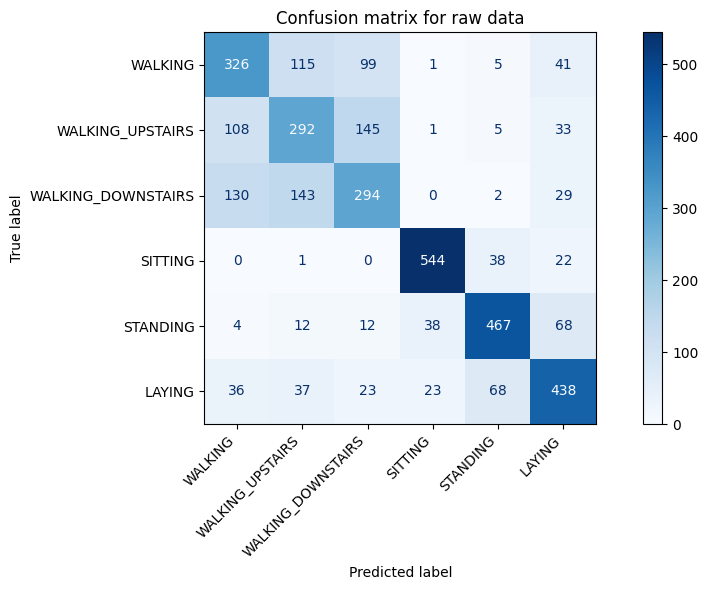

In [6]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
cm=confusion_matrix(y_test,predictions_raw)
cm_beautified=ConfusionMatrixDisplay(cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,6))  
cm_beautified.plot(cmap='Blues', ax=ax)
plt.title('Confusion matrix for raw data')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [7]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test,predictions_raw)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test,predictions_raw,average='macro',zero_division=1)
print(f"Precision: {precision * 100:.2f}%")
# Calculate recall

recall = recall_score(y_test,predictions_raw, average='macro')
print(f"Recall: {recall * 100:.2f}%")
7
# Calculate F1 score
f1 = f1_score(y_test,predictions_raw, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 65.58%
Precision: 65.47%
Recall: 65.40%
F1 Score: 65.42%


As we can see the model is performing very poor compare the Standard, probably because the data we collected in wild was not as good as compare 
to the one given in the assingment. 

As we can infer from the confusion matrix that it is badly classifying the activites among the STATIC activities(SITTING,STANDING,LAYING)
and DYANAMIC activites(WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS)


--------------------------------------------------------------------------------------------------------------------------------------
TASK 4 QUESTION 3

Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform?


In [8]:
from langchain_groq.chat_models import ChatGroq
from MakeDataset import X_test,X_train,y_test,y_train

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [9]:

Groq_Token = "Enter Pin"  # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [10]:
y_train_expanded = np.expand_dims(y_train, axis=-1) # Shape becomes (126, 1)
y_train_expanded = np.expand_dims(y_train_expanded, axis=-1) # Shape becomes(126, 1, 1)
y_train_broadcasted = np.tile(y_train_expanded, (1, 500, 1)) # Shape becomes  (126, 500, 1)
# Concatenate X_train and y_train_broadcasted along the last axis
new_X_train = np.concatenate((X_train, y_train_broadcasted), axis=-1) # Shape becomes (126, 500, 4)
new_y_train = y_train_broadcasted

In [11]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('path')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Extract features (first 3 columns) and target variable (4th column)
X = df.iloc[:, :3]  # Features: first 3 columns
y = df.iloc[:, 3]   # Target variable: 4th column

# Split the data into training and testing sets
X_train_wild, X_test_wild, y_train_wild, y_test_wild = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
y_test_wild = y_test_wild.to_numpy()
X_test_wild = X_test_wild.to_numpy()
print(X_test_wild.shape)

(3600, 3)


In [13]:
#function to convert activity label back to activity name
def get_activity_class(activity_number):
    activity_classes = {
    1: "WALKING",
    2: "WALKING_DOWNSTAIRS",
    3: "WALKING_UPSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
    }
    return activity_classes.get(activity_number, "Invalid input")


In [19]:
predicted_label_list = []
actual_label_list = []

for i in range(1,10):
    test_sub = i
    train_sub_data = X_train
    train_sub_label = new_y_train
    test_sub_data = X_test_wild[test_sub]
    test_sub_label = get_activity_class(y_test_wild[test_sub])


    # Format the data for the model
    prompt = f"""Here is a sequence of accelerometer data and corresponding 
    activity label:\nData: {train_sub_data}\nLabel: {train_sub_label}\n
    The data that is of shape (126, 500, 3) which means there are 126 instances of
    500 data points in each of the 3 axes.
    The label is the corresponding activity the human is currently doing.
    Shape of label is (126, 500, 1) which means for each instance there is only 1 label.
    The next sequence of accelerometer data is this: \nData: {test_sub_data}\n
    Your job is to predict the activity class of this data using the data and corresponding label that we gave earlier
    There are 6 categories of activity that you can choose from namely 'LAYING','SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'
    What activity class does this data represent?
    Give one-word answer"""


    # To use Groq LLMs
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token,temperature=0) # type: ignore
    answer = llm.invoke(prompt)
    print(answer.content)
    print(test_sub_label)
    predicted_label_list.append(answer.content)
    actual_label_list.append(test_sub_label)


WALKING
WALKING_UPSTAIRS
STANDING
STANDING
WALKING
WALKING
WALKING
WALKING_DOWNSTAIRS
WALKING
WALKING
STANDING
LAYING
STANDING
STANDING
STANDING
SITTING
STANDING
SITTING


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Calculate accuracy
accuracy = accuracy_score(actual_label_list, predicted_label_list)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(actual_label_list, predicted_label_list,average='macro',zero_division=1)
print(f"Precision: {precision * 100:.2f}%")
# Calculate recall

recall = recall_score(actual_label_list, predicted_label_list, average='macro',zero_division=1)
print(f"Recall: {recall * 100:.2f}%")
7
# Calculate F1 score
f1 = f1_score(actual_label_list, predicted_label_list, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 44.44%
Precision: 81.67%
Recall: 33.33%
F1 Score: 20.63%


In [21]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
print(classification_report(actual_label_list, predicted_label_list,zero_division=1))


                    precision    recall  f1-score   support

            LAYING       1.00      0.00      0.00         1
           SITTING       1.00      0.00      0.00         2
          STANDING       0.40      1.00      0.57         2
           WALKING       0.50      1.00      0.67         2
WALKING_DOWNSTAIRS       1.00      0.00      0.00         1
  WALKING_UPSTAIRS       1.00      0.00      0.00         1

          accuracy                           0.44         9
         macro avg       0.82      0.33      0.21         9
      weighted avg       0.76      0.44      0.28         9



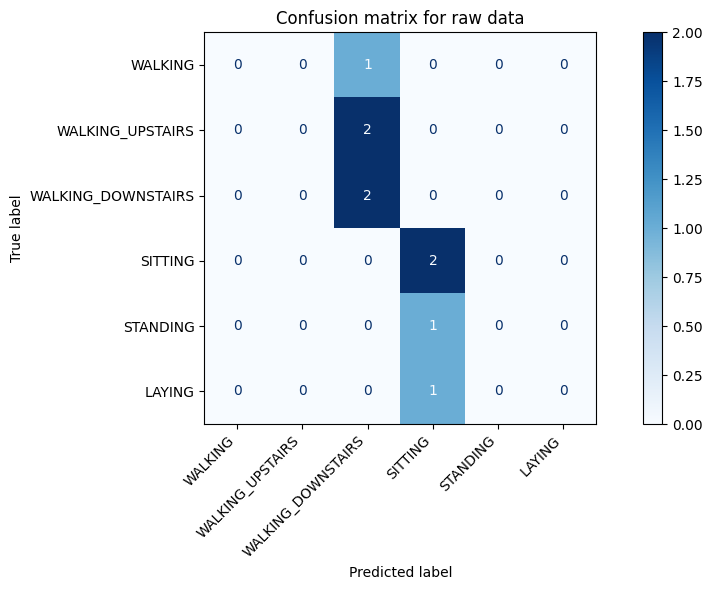

In [22]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
cm=confusion_matrix(actual_label_list, predicted_label_list)
cm_beautified=ConfusionMatrixDisplay(cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,6))  
cm_beautified.plot(cmap='Blues', ax=ax)
plt.title('Confusion matrix for raw data')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

The model is performing poorly because the few shot is not able to use proper processing for data
and also the data used is not good as provied in the assingment and because of the limitatons i stated above
i am only able to test model on few samples.

--------------------------------------------------------------------------------------------------------------------------------------
TASK 4 QUESTION 4

Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform?

In [24]:

from sklearn.model_selection import train_test_split


In [25]:
df = pd.read_csv('path')
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.describe()

,accx,accy,accz,label
count,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.172370,-0.336474,-0.193420,3.500000
std,2.592275,2.543150,1.881788,1.707896
min,-19.414400,-27.223500,-26.736300,1.000000
25%,-0.160900,-0.308925,-0.378575,2.000000
50%,0.091200,0.012650,-0.053100,3.500000
75%,0.686050,0.196875,0.181925,5.000000
max,17.711700,15.958800,20.352300,6.000000


In [26]:
# Extract features (first 3 columns) and target variable (4th column)
X = df.iloc[:, :3]  # Features: first 3 columns
y = df.iloc[:, 3]   # Target variable: 4th column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8400, 3)
X_test shape: (3600, 3)
y_train shape: (8400,)
y_test shape: (3600,)


In [27]:
y_test = np.array(y_test)
y_train = np.array(y_train)
X_test = np.array(X_test)
X_train = np.array(X_train)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (8400, 3)
X_test shape: (3600, 3)
y_train shape: (8400,)
y_test shape: (3600,)


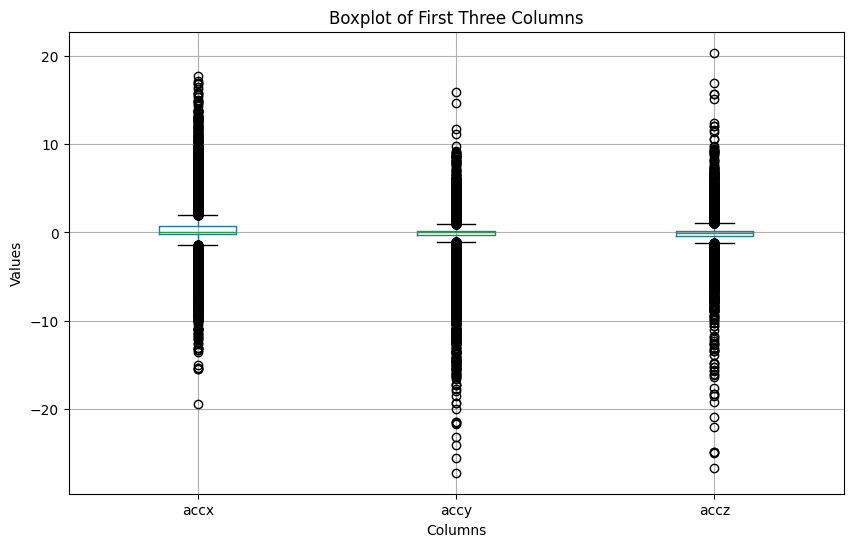

In [28]:
plt.figure(figsize=(10,6)) # to find the range of my data
X.boxplot()
plt.title('Boxplot of First Three Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [29]:
#function to convert activity label back to activity name
def get_activity_class(activity_number):
    activity_classes = {
    1: "WALKING",
    2: "WALKING_DOWNSTAIRS",
    3: "WALKING_UPSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
    }
    return activity_classes.get(activity_number, "Invalid input")


In [30]:
X_test_sub = X_test[:10]
print(X_test_sub.shape)

(10, 3)


In [32]:
predicted_label_list = []
actual_label_list = []

for i in range(1,10):
    test_sub = i
    train_sub_data = X_train
    train_sub_label = y_train
    test_sub_data = X_test[test_sub]
    test_sub_label = get_activity_class(y_test[test_sub])


    # Format the data for the model
    prompt = f"""Here is a sequence of accelerometer data and corresponding 
    activity label:\nData: {train_sub_data}\nLabel: {train_sub_label}\n
    The data that is of shape (126, 500, 3) which means there are 126 instances of
    500 data points in each of the 3 axes.
    The label is the corresponding activity the human is currently doing.
    Shape of label is (126, 500, 1) which means for each instance there is only 1 label.
    The next sequence of accelerometer data is this: \nData: {test_sub_data}\n
    Your job is to predict the activity class of this data using the data and corresponding label that we gave earlier
    There are 6 categories of activity that you can choose from namely 'LAYING','SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'
    What activity class does this data represent?
    Give one-word answer"""


    # To use Groq LLMs
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token,temperature=0) # type: ignore
    answer = llm.invoke(prompt)
    print(answer.content)
    print(test_sub_label)
    predicted_label_list.append(answer.content)
    actual_label_list.append(test_sub_label)

WALKING_DOWNSTAIRS
WALKING_UPSTAIRS
STANDING
STANDING
WALKING
WALKING
WALKING_DOWNSTAIRS
WALKING_DOWNSTAIRS
WALKING
WALKING
WALKING
LAYING
STANDING
STANDING
WALKING
SITTING
WALKING
SITTING


In [33]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(actual_label_list, predicted_label_list)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(actual_label_list, predicted_label_list,average='macro',zero_division=1)
print(f"Precision: {precision * 100:.2f}%")
# Calculate recall

recall = recall_score(actual_label_list, predicted_label_list, average='macro')
print(f"Recall: {recall * 100:.2f}%")
7
# Calculate F1 score
f1 = f1_score(actual_label_list, predicted_label_list, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 55.56%
Precision: 81.67%
Recall: 50.00%
F1 Score: 37.30%


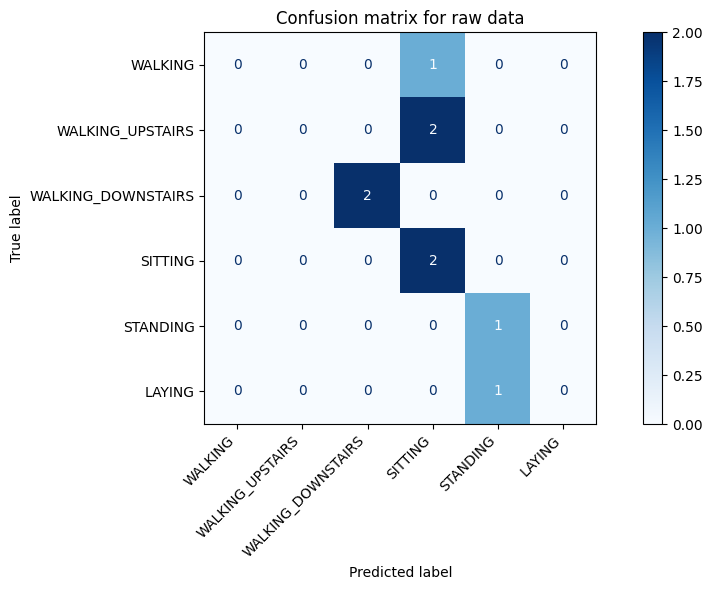

In [34]:
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
cm=confusion_matrix(actual_label_list, predicted_label_list)
cm_beautified=ConfusionMatrixDisplay(cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,6))  
cm_beautified.plot(cmap='Blues', ax=ax)
plt.title('Confusion matrix for raw data')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

The model is performing poorly because the few shot is not able to use proper processing for data
and also the data used is not good as provied in the assingment and because of the limitatons i stated above
i am only able to test model on few samples.